Goal: build a model to predict the Average Rating of board games on the BoardGamesGeek website


In [2]:
# importing important libraries:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [3]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

## Data Extraction

In [5]:
game_data = pd.read_csv("games.csv")

In [9]:
game_data.columns

Index(['BGGId', 'Name', 'Description', 'YearPublished', 'GameWeight',
       'AvgRating', 'BayesAvgRating', 'StdDev', 'MinPlayers', 'MaxPlayers',
       'ComAgeRec', 'LanguageEase', 'BestPlayers', 'GoodPlayers', 'NumOwned',
       'NumWant', 'NumWish', 'NumWeightVotes', 'MfgPlaytime', 'ComMinPlaytime',
       'ComMaxPlaytime', 'MfgAgeRec', 'NumUserRatings', 'NumComments',
       'NumAlternates', 'NumExpansions', 'NumImplementations',
       'IsReimplementation', 'Family', 'Kickstarted', 'ImagePath',
       'Rank:boardgame', 'Rank:strategygames', 'Rank:abstracts',
       'Rank:familygames', 'Rank:thematic', 'Rank:cgs', 'Rank:wargames',
       'Rank:partygames', 'Rank:childrensgames', 'Cat:Thematic',
       'Cat:Strategy', 'Cat:War', 'Cat:Family', 'Cat:CGS', 'Cat:Abstract',
       'Cat:Party', 'Cat:Childrens'],
      dtype='object')

In [11]:
sub_data = pd.read_csv("subcategories.csv")

In [13]:
mech_data = pd.read_csv("mechanics.csv")

In [15]:
merged_df = pd.merge(game_data, sub_data, on='BGGId', how='inner')
merged_df = pd.merge(merged_df, mech_data, on='BGGId', how='inner')

In [17]:
pd.set_option('display.max_columns', None)

In [19]:
merged_df.head()

,BGGId,Name,Description,YearPublished,GameWeight,AvgRating,BayesAvgRating,StdDev,MinPlayers,MaxPlayers,ComAgeRec,LanguageEase,BestPlayers,GoodPlayers,NumOwned,NumWant,NumWish,NumWeightVotes,MfgPlaytime,ComMinPlaytime,ComMaxPlaytime,MfgAgeRec,NumUserRatings,NumComments,NumAlternates,NumExpansions,NumImplementations,IsReimplementation,Family,Kickstarted,ImagePath,Rank:boardgame,Rank:strategygames,Rank:abstracts,Rank:familygames,Rank:thematic,Rank:cgs,Rank:wargames,Rank:partygames,Rank:childrensgames,Cat:Thematic,Cat:Strategy,Cat:War,Cat:Family,Cat:CGS,Cat:Abstract,Cat:Party,Cat:Childrens,Exploration,Miniatures,Territory Building,Card Game,Educational,Puzzle,Collectible Components,Word Game,Print & Play,Electronic,Alliances,Area Majority / Influence,Auction/Bidding,Dice Rolling,Hand Management,Simultaneous Action Selection,Trick-taking,Hexagon Grid,Once-Per-Game Abilities,Set Collection,Tile Placement,Action Points,Investment,Market,Square Grid,Stock Holding,Victory Points as a Resource,Enclosure,Pattern Building,Pattern Recognition,Modular Board,Network and Route Building,Point to Point Movement,Melding and Splaying,Negotiation,Trading,Push Your Luck,Income,Race,Random Production,Variable Set-up,Roll / Spin and Move,Variable Player Powers,Action Queue,Bias,Grid Movement,Lose a Turn,Programmed Movement,Scenario / Mission / Campaign Game,Voting,Events,Paper-and-Pencil,Player Elimination,Role Playing,Movement Points,Simulation,Variable Phase Order,Area Movement,Commodity Speculation,Cooperative Game,Deduction,Sudden Death Ending,Connections,Highest-Lowest Scoring,Betting and Bluffing,Memory,Score-and-Reset Game,Layering,Map Addition,Secret Unit Deployment,Increase Value of Unchosen Resources,Ratio / Combat Results Table,Take That,Team-Based Game,Campaign / Battle Card Driven,Tech Trees / Tech Tracks,Player Judge,Chit-Pull System,Three Dimensional Movement,Action Drafting,Minimap Resolution,Stat Check Resolution,Action Timer,Pick-up and Deliver,Map Deformation,Bingo,Crayon Rail System,Multiple Maps,Hidden Roles,Line Drawing,Tug of War,Pattern Movement,Static Capture,Different Dice Movement,Chaining,Ladder Climbing,Predictive Bid,Solo / Solitaire Game,Line of Sight,Critical Hits and Failures,Interrupts,Zone of Control,Bribery,End Game Bonuses,Area-Impulse,Worker Placement,Measurement Movement,Map Reduction,Real-Time,Resource to Move,Mancala,Ownership,Kill Steal,Hidden Movement,Track Movement,Deck Construction,Drafting,TableauBuilding,Prisoner's Dilemma,Hidden Victory Points,Movement Template,Slide/Push,Targeted Clues,Command Cards,Grid Coverage,Relative Movement,Action/Event,Card Play Conflict Resolution,"I Cut, You Choose",Die Icon Resolution,Elapsed Real Time Ending,Advantage Token,Storytelling,Catch the Leader,Roles with Asymmetric Information,Traitor Game,Moving Multiple Units,Semi-Cooperative Game,Communication Limits,Time Track,Speed Matching,Cube Tower,Re-rolling and Locking,Impulse Movement,Loans,Delayed Purchase,"Deck, Bag, and Pool Building",Move Through Deck,Single Loser Game,Matching,Induction,Physical Removal,Narrative Choice / Paragraph,Pieces as Map,Follow,Finale Ending,Order Counters,Contracts,Passed Action Token,King of the Hill,Action Retrieval,Force Commitment,Rondel,Automatic Resource Growth,Legacy Game,Dexterity,Physical
0,1,Die Macher,die macher game seven sequential political rac...,1986,4.3206,7.61428,7.10363,1.57979,3,5,14.366667,1.395833,5,"['4', '5']",7498,501,2039,761,240,240,240,14,5354,0,2,0,0,0,Classic Line (Valley Games),0,https://cf.geekdo-images.com/rpwCZAjYLD940NWwP...,316,180,21926,21926,21926,21926,21926,21926,21926,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,Dragonmaster,dragonmaster tricktak

### Column Standardization

In [22]:
merged_df.columns = [column.lower().replace(' ', '_') for column in merged_df.columns]

In [24]:
print(merged_df.shape)

(21925, 215)


In [26]:
merged_df = merged_df.set_index("bggid")

## Data Cleaning

In [29]:
#Let's have a look at our object/ non-numerical columns
object_columns = merged_df.select_dtypes(exclude="number")
print(object_columns.info())

<class 'pandas.core.frame.DataFrame'>
Index: 21925 entries, 1 to 349161
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   name         21925 non-null  object
 1   description  21924 non-null  object
 2   goodplayers  21925 non-null  object
 3   family       6663 non-null   object
 4   imagepath    21908 non-null  object
dtypes: object(5)
memory usage: 1.0+ MB
None


So, "name", "description", and "imagepath" are not variables we are interested in as predictors of Average Game Rating. We will discard them for the sake of this analysis.

In [32]:
merged_df.family.nunique()

1456

In [34]:
merged_df.family.isnull().sum()

15262

"goodplayers" gives us lists of community voted best player counts, but we will keep only the "bestplayers" variable to represent the community voted best player count.

For the sake of this analysis, we are not going to encode game families, but will focus only on other categorical possible predictors of average rating like game category, subcategory and mechanics.

In [38]:
df = merged_df.copy()

In [40]:
# Keeping only numerical variables:
df = df.select_dtypes(include="number")

In [42]:
df.head(5)

,yearpublished,gameweight,avgrating,bayesavgrating,stddev,minplayers,maxplayers,comagerec,languageease,bestplayers,numowned,numwant,numwish,numweightvotes,mfgplaytime,comminplaytime,commaxplaytime,mfgagerec,numuserratings,numcomments,numalternates,numexpansions,numimplementations,isreimplementation,kickstarted,rank:boardgame,rank:strategygames,rank:abstracts,rank:familygames,rank:thematic,rank:cgs,rank:wargames,rank:partygames,rank:childrensgames,cat:thematic,cat:strategy,cat:war,cat:family,cat:cgs,cat:abstract,cat:party,cat:childrens,exploration,miniatures,territory_building,card_game,educational,puzzle,collectible_components,word_game,print_&_play,electronic,alliances,area_majority_/_influence,auction/bidding,dice_rolling,hand_management,simultaneous_action_selection,trick-taking,hexagon_grid,once-per-game_abilities,set_collection,tile_placement,action_points,investment,market,square_grid,stock_holding,victory_points_as_a_resource,enclosure,pattern_building,pattern_recognition,modular_board,network_and_route_building,point_to_point_movement,melding_and_splaying,negotiation,trading,push_your_luck,income,race,random_production,variable_set-up,roll_/_spin_and_move,variable_player_powers,action_queue,bias,grid_movement,lose_a_turn,programmed_movement,scenario_/_mission_/_campaign_game,voting,events,paper-and-pencil,player_elimination,role_playing,movement_points,simulation,variable_phase_order,area_movement,commodity_speculation,cooperative_game,deduction,sudden_death_ending,connections,highest-lowest_scoring,betting_and_bluffing,memory,score-and-reset_game,layering,map_addition,secret_unit_deployment,increase_value_of_unchosen_resources,ratio_/_combat_results_table,take_that,team-based_game,campaign_/_battle_card_driven,tech_trees_/_tech_tracks,player_judge,chit-pull_system,three_dimensional_movement,action_drafting,minimap_resolution,stat_check_resolution,action_timer,pick-up_and_deliver,map_deformation,bingo,crayon_rail_system,multiple_maps,hidden_roles,line_drawing,tug_of_war,pattern_movement,static_capture,different_dice_movement,chaining,ladder_climbing,predictive_bid,solo_/_solitaire_game,line_of_sight,critical_hits_and_failures,interrupts,zone_of_control,bribery,end_game_bonuses,area-impulse,worker_placement,measurement_movement,map_reduction,real-time,resource_to_move,mancala,ownership,kill_steal,hidden_movement,track_movement,deck_construction,drafting,tableaubuilding,prisoner's_dilemma,hidden_victory_points,movement_template,slide/push,targeted_clues,command_cards,grid_coverage,relative_movement,action/event,card_play_conflict_resolution,"i_cut,_you_choose",die_icon_resolution,elapsed_real_time_ending,advantage_token,storytelling,catch_the_leader,roles_with_asymmetric_information,traitor_game,moving_multiple_units,semi-cooperative_game,communication_limits,time_track,speed_matching,cube_tower,re-rolling_and_locking,impulse_movement,loans,delayed_purchase,"deck,_bag,_and_pool_building",move_through_deck,single_loser_game,matching,induction,physical_removal,narrative_choice_/_paragraph,pieces_as_map,follow,finale_ending,order_counters,contracts,passed_action_token,king_of_the_hill,action_retrieval,force_commitment,rondel,automatic_resource_growth,legacy_game,dexterity,physical
bggid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,1986,4.3206,7.61428,7.10363,1.57979,3,5,14.366667,1.395833,5,7498,501,2039,761,240,240,240,14,5354,0,2,0,0,0,0,316,180,21926,21926,21926,21926,21926,21926,21926,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1981,1.9630,6.64537,5.78447

In [44]:
print(df.duplicated().sum())

0


In [46]:
null_counts = df.isna().sum()

# Filter for columns with null values only
null_counts = null_counts[null_counts > 0]
print("Columns with null values and their counts:")
print(null_counts)

Columns with null values and their counts:
comagerec       5530
languageease    5891
dtype: int64


In [48]:
df.languageease.nunique()

3794

We only have null values for the "comagerec" and the "languageease" variables. We will drop these columns and explore the rest.

In [51]:
df.drop(columns=["comagerec", "languageease"], inplace=True)

In [53]:
unique_counts = df.nunique()

# Filter for columns with only one unique value
constant_cols = unique_counts[unique_counts == 1]
print("Columns with only one unique value:")
for col in constant_cols.index:
    print(f"{col}: {df[col].unique()[0]}")

Columns with only one unique value:
numcomments: 0


We have one variable - 'numcomments' - that is a constant column, having only one unique value: 0. Therefore, we will drop this column from our working dataset.

In [56]:
df.drop(columns=["numcomments"], inplace=True)

##### Because we want to be able to predict the average rating of board games *before* they are released into the marked, we will drop the following columns:
 - bayesavgrating (it's estimated with the average rating, which will be our target)
 - stddev (it's relative to the bayesavgrating)
 - numweightvotes
 - numwish
 - numwant
 - numuserratings
 - numalternates
 - numimplementations
 - isreimplementation
 - numowned
 - all the 'rank:' columns (they are redundant with the category classification, and we wouldn't know how the game ranks before it's released)
 - for the same reason, we're also dropping the "community voting" features: bestplayers, comminplaytime, commaxplaytime.

In [59]:
cols_to_drop = ["bayesavgrating", "stddev", "numwish", "numwant", "numowned", "numuserratings", "numweightvotes", "numalternates", "numimplementations", "isreimplementation", 'rank:boardgame', 'rank:strategygames', 'rank:abstracts', 'rank:familygames', 'rank:thematic', 'rank:cgs', 'rank:wargames','rank:partygames','rank:childrensgames', "bestplayers", "comminplaytime", "commaxplaytime"]

In [61]:
df.drop(columns=cols_to_drop, inplace=True)

In [63]:
#Our target, dependent variable is goint to be "avgrating" - let's move it to the right of the dataframe

In [65]:
target = df.pop("avgrating")
df["avgrating"] = target

## Data Processing

In [68]:
X = df.drop(columns=["avgrating"])
y = df["avgrating"]

In [70]:
X.head(3)

,yearpublished,gameweight,minplayers,maxplayers,mfgplaytime,mfgagerec,numexpansions,kickstarted,cat:thematic,cat:strategy,cat:war,cat:family,cat:cgs,cat:abstract,cat:party,cat:childrens,exploration,miniatures,territory_building,card_game,educational,puzzle,collectible_components,word_game,print_&_play,electronic,alliances,area_majority_/_influence,auction/bidding,dice_rolling,hand_management,simultaneous_action_selection,trick-taking,hexagon_grid,once-per-game_abilities,set_collection,tile_placement,action_points,investment,market,square_grid,stock_holding,victory_points_as_a_resource,enclosure,pattern_building,pattern_recognition,modular_board,network_and_route_building,point_to_point_movement,melding_and_splaying,negotiation,trading,push_your_luck,income,race,random_production,variable_set-up,roll_/_spin_and_move,variable_player_powers,action_queue,bias,grid_movement,lose_a_turn,programmed_movement,scenario_/_mission_/_campaign_game,voting,events,paper-and-pencil,player_elimination,role_playing,movement_points,simulation,variable_phase_order,area_movement,commodity_speculation,cooperative_game,deduction,sudden_death_ending,connections,highest-lowest_scoring,betting_and_bluffing,memory,score-and-reset_game,layering,map_addition,secret_unit_deployment,increase_value_of_unchosen_resources,ratio_/_combat_results_table,take_that,team-based_game,campaign_/_battle_card_driven,tech_trees_/_tech_tracks,player_judge,chit-pull_system,three_dimensional_movement,action_drafting,minimap_resolution,stat_check_resolution,action_timer,pick-up_and_deliver,map_deformation,bingo,crayon_rail_system,multiple_maps,hidden_roles,line_drawing,tug_of_war,pattern_movement,static_capture,different_dice_movement,chaining,ladder_climbing,predictive_bid,solo_/_solitaire_game,line_of_sight,critical_hits_and_failures,interrupts,zone_of_control,bribery,end_game_bonuses,area-impulse,worker_placement,measurement_movement,map_reduction,real-time,resource_to_move,mancala,ownership,kill_steal,hidden_movement,track_movement,deck_construction,drafting,tableaubuilding,prisoner's_dilemma,hidden_victory_points,movement_template,slide/push,targeted_clues,command_cards,grid_coverage,relative_movement,action/event,card_play_conflict_resolution,"i_cut,_you_choose",die_icon_resolution,elapsed_real_time_ending,advantage_token,storytelling,catch_the_leader,roles_with_asymmetric_information,traitor_game,moving_multiple_units,semi-cooperative_game,communication_limits,time_track,speed_matching,cube_tower,re-rolling_and_locking,impulse_movement,loans,delayed_purchase,"deck,_bag,_and_pool_building",move_through_deck,single_loser_game,matching,induction,physical_removal,narrative_choice_/_paragraph,pieces_as_map,follow,finale_ending,order_counters,contracts,passed_action_token,king_of_the_hill,action_retrieval,force_commitment,rondel,automatic_resource_growth,legacy_game,dexterity,physical
bggid,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,1986,4.3206,3,5,240,14,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1981,1.9630,3,4,30,12,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1998,2.4859,2,4,60,10,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [72]:
X.shape

(21925, 183)

## Data Modeling

In [75]:
from sklearn.model_selection import train_test_split

In [77]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [79]:
print(f'100% of our data: {len(df)}.')
print(f'70% for training data: {len(X_train)}.')
print(f'30% for test data: {len(X_test)}.')

100% of our data: 21925.
70% for training data: 15347.
30% for test data: 6578.


In [81]:
#Writting a function to run several ML models and retur their respective metrics

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error 
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb
from xgboost import XGBRFRegressor


def compare_models(X_train, X_test, y_train, y_test):
    models = {
        "Linear Regression": LinearRegression(),
        "Ridge Regression": Ridge(),
        "Lasso Regression": Lasso(),
        "Decision Tree": DecisionTreeRegressor(),
        "KNN Regression": KNeighborsRegressor(),
        "XGBoost Regression": xgb.XGBRFRegressor()
    }
    
    results = []
    predictions_dict = {}
    for model_name, model in models.items():
        model.fit(X_train, y_train)
        predictions_test = model.predict(X_test)
        predictions_train = model.predict(X_train)
        predictions_dict[model_name] = predictions_test
        
        r2 = r2_score(y_test, predictions_test)
        rmse = mean_squared_error(y_test, predictions_test, squared=False)
        mse = mean_squared_error(y_test, predictions_test)
        mae = mean_absolute_error(y_test, predictions_test)
        rmse_train = mean_squared_error(y_train, predictions_train, squared=False)
        
        results.append({
            "Model": model_name,
            "R2": r2,
            "RMSE (Test)": rmse,
            "RMSE (Train)": rmse_train,
            "MSE (Test)": mse,
            "MAE (Test)": mae
        })
   
    results_df = pd.DataFrame(results).set_index("Model")
    return results_df, predictions_dict

In [83]:
results_df, predictions_dict = compare_models(X_train, X_test, y_train, y_test)

In [85]:
results_df

,R2,RMSE (Test),RMSE (Train),MSE (Test),MAE (Test)
Model,,,,,
Linear Regression,0.384150,0.743641,0.721046,0.553002,0.558751
Ridge Regression,0.384452,0.743459,0.721067,0.552731,0.558587
Lasso Regression,-0.078944,0.984295,0.911256,0.968837,0.734510
Decision Tree,0.105813,0.896066,0.007768,0.802934,0.669629
KNN Regression,0.383857,0.743818,0.599267,0.553265,0.570399
XGBoost Regression,0.488491,0.677724,0.647357,0.459309,0.511033


This is our baseline model. Let's look at the distributions of our numerical variables to see if we can do some more cleaning:

In [90]:
df.describe()

,yearpublished,gameweight,minplayers,maxplayers,mfgplaytime,mfgagerec,numexpansions,kickstarted,cat:thematic,cat:strategy,cat:war,cat:family,cat:cgs,cat:abstract,cat:party,cat:childrens,exploration,miniatures,territory_building,card_game,educational,puzzle,collectible_components,word_game,print_&_play,electronic,alliances,area_majority_/_influence,auction/bidding,dice_rolling,hand_management,simultaneous_action_selection,trick-taking,hexagon_grid,once-per-game_abilities,set_collection,tile_placement,action_points,investment,market,square_grid,stock_holding,victory_points_as_a_resource,enclosure,pattern_building,pattern_recognition,modular_board,network_and_route_building,point_to_point_movement,melding_and_splaying,negotiation,trading,push_your_luck,income,race,random_production,variable_set-up,roll_/_spin_and_move,variable_player_powers,action_queue,bias,grid_movement,lose_a_turn,programmed_movement,scenario_/_mission_/_campaign_game,voting,events,paper-and-pencil,player_elimination,role_playing,movement_points,simulation,variable_phase_order,area_movement,commodity_speculation,cooperative_game,deduction,sudden_death_ending,connections,highest-lowest_scoring,betting_and_bluffing,memory,score-and-reset_game,layering,map_addition,secret_unit_deployment,increase_value_of_unchosen_resources,ratio_/_combat_results_table,take_that,team-based_game,campaign_/_battle_card_driven,tech_trees_/_tech_tracks,player_judge,chit-pull_system,three_dimensional_movement,action_drafting,minimap_resolution,stat_check_resolution,action_timer,pick-up_and_deliver,map_deformation,bingo,crayon_rail_system,multiple_maps,hidden_roles,line_drawing,tug_of_war,pattern_movement,static_capture,different_dice_movement,chaining,ladder_climbing,predictive_bid,solo_/_solitaire_game,line_of_sight,critical_hits_and_failures,interrupts,zone_of_control,bribery,end_game_bonuses,area-impulse,worker_placement,measurement_movement,map_reduction,real-time,resource_to_move,mancala,ownership,kill_steal,hidden_movement,track_movement,deck_construction,drafting,tableaubuilding,prisoner's_dilemma,hidden_victory_points,movement_template,slide/push,targeted_clues,command_cards,grid_coverage,relative_movement,action/event,card_play_conflict_resolution,"i_cut,_you_choose",die_icon_resolution,elapsed_real_time_ending,advantage_token,storytelling,catch_the_leader,roles_with_asymmetric_information,traitor_game,moving_multiple_units,semi-cooperative_game,communication_limits,time_track,speed_matching,cube_tower,re-rolling_and_locking,impulse_movement,loans,delayed_purchase,"deck,_bag,_and_pool_building",move_through_deck,single_loser_game,matching,induction,physical_removal,narrative_choice_/_paragraph,pieces_as_map,follow,finale_ending,order_counters,contracts,passed_action_token,king_of_the_hill,action_retrieval,force_commitment,rondel,automatic_resource_growth,legacy_game,dexterity,physical,avgrating
count,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000,21925.00000,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000,21925.000000,21925

In [92]:
df[df.maxplayers == 0].value_counts().count()

173

It doesn't make sense that the maximum reccommended number of players is zero, so we will delete these rows:

In [95]:
df = df[df.maxplayers != 0]

In [97]:
df[df.minplayers == 0].value_counts().count()

9

The same thing applies for the minimum number of reccommended players:

In [100]:
df = df[df.minplayers != 0]

In [102]:
df[df.mfgagerec == 0].value_counts().count()

1272

Also, for the manufacturer age recommendation:

In [105]:
df = df[df.mfgagerec != 0]

"gameweight", which corresponds to scaled game complexity, ranges from 0 to 1, So we will remove the rows with 0:

In [108]:
df[df.gameweight == 0].value_counts().count()

469

In [110]:
df = df[df.gameweight != 0]

In [117]:
df[df.mfgplaytime == 0].value_counts().count()

498

These "zeroes" actually correspond to null values - games to which the manufacturer didn't provide information about play time.

In [124]:
df = df[df.mfgplaytime != 0]

In [137]:
df.shape

(19504, 184)

Let's fit our models again:

In [127]:
X = df.drop(columns=["avgrating"])
y = df["avgrating"]

In [129]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [131]:
results_df, predictions_dict = compare_models(X_train, X_test, y_train, y_test)

In [139]:
results_df

,R2,RMSE (Test),RMSE (Train),MSE (Test),MAE (Test)
Model,,,,,
Linear Regression,0.409143,0.709694,0.695370,0.503666,0.532863
Ridge Regression,0.409708,0.709355,0.695394,0.503185,0.532551
Lasso Regression,0.020348,0.913831,0.901084,0.835088,0.709311
Decision Tree,0.151931,0.850248,0.008770,0.722922,0.642499
KNN Regression,0.378226,0.728025,0.581999,0.530020,0.546452
XGBoost Regression,0.499967,0.652874,0.625773,0.426245,0.485813


Before removing these zero values, our results were slightly worse (except for the KNN regression):

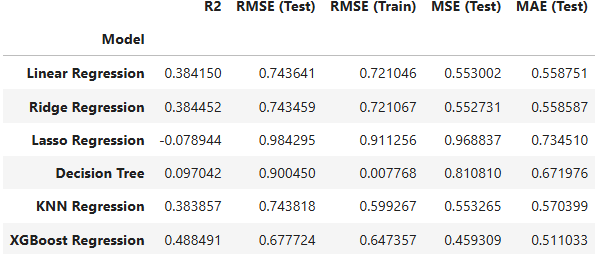

## EDA - visualizing distributions of numerical variables:

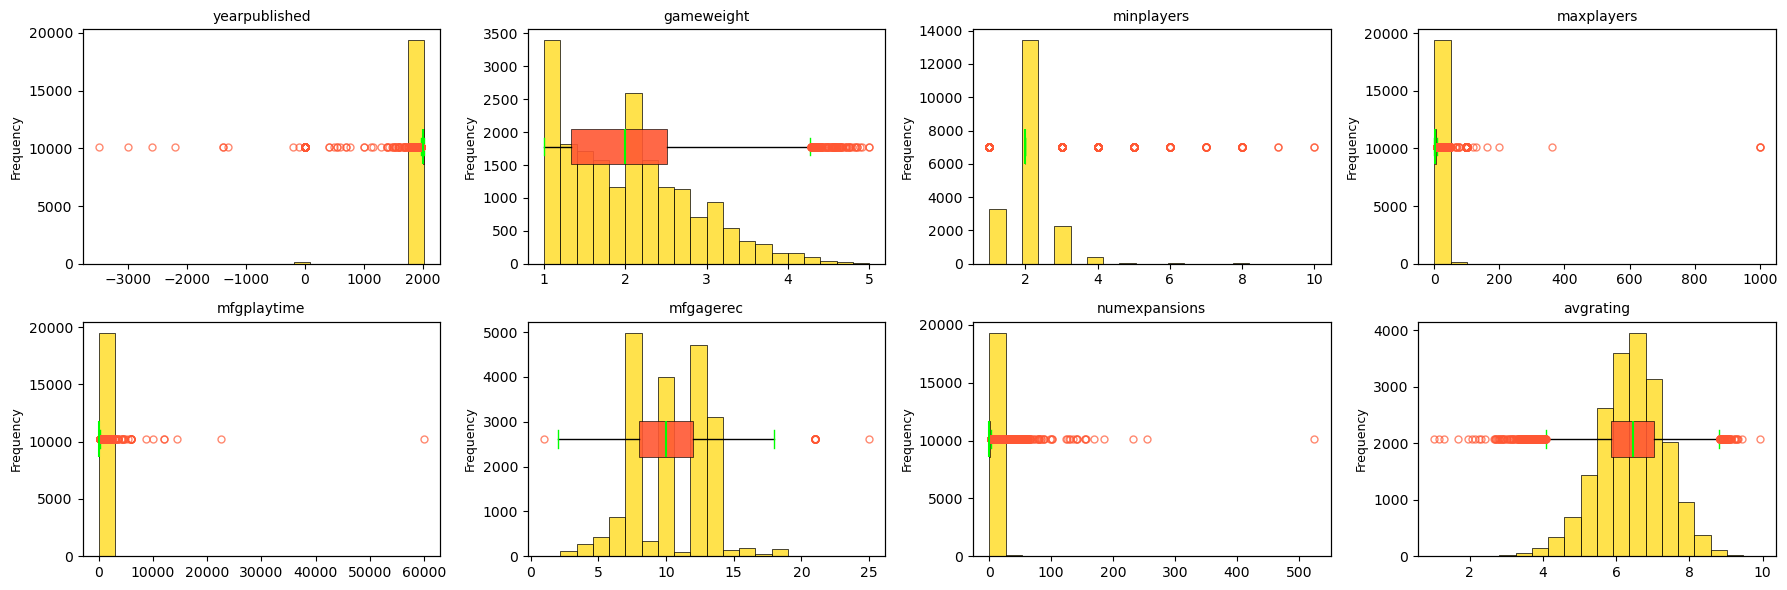

In [141]:
df_columns = df.columns.tolist()
non_binary_columns = [col for col in df_columns if df[col].nunique() > 2]

# Define grid layout
ncols = 4
nrows = -(-len(non_binary_columns) // ncols)  # Calculate rows (ceil division)
fig, axes = plt.subplots(nrows, ncols, figsize=(18, nrows * 3))
axes = axes.flatten()  # Flatten axes for easy iteration


# Plot each numerical column
for i, col in enumerate(non_binary_columns):
    # Plot histogram
    sns.histplot(df[col], kde=False, bins=20, color="gold", ax=axes[i], alpha=0.7, linewidth=0.5)
    axes[i].set_xlabel("")
    # Overlay horizontal boxplot
    box_ax = axes[i].twinx()  # Create a twin y-axis for the boxplot
    box_ax.boxplot(
        df[col],
        vert=False,  # Horizontal boxplot
        patch_artist=True, 
        boxprops=dict(facecolor='#FF5733', color='black', alpha=0.9, linewidth=0.5),  # Neon green box
        medianprops=dict(color='lime', linewidth=1.5),  # Yellow median line
        whiskerprops=dict(color='black'), 
        capprops=dict(color='lime', linewidth=1), 
        flierprops=dict(
            marker='o',  # Marker style for outliers
            color='#FF5733',  # Fill color of outliers
            markeredgecolor="#FF5733",  # Border color of outliers
            alpha=0.7,
            markersize=5  # Size of outliers
        )
    )
    
   # Adjust boxplot to center vertically on histogram
    y_hist_max = axes[i].get_ylim()[1]  # Get the maximum y-axis value of the histogram
    boxplot_center = y_hist_max / 2

    # Remove the twin y-axis ticks and labels
    box_ax.set_yticks([])  # Hide the right-side y-axis ticks
    box_ax.get_yaxis().set_visible(False)  # Completely hide the y-axis
    
    # Set titles and labels
    axes[i].set_title(f"{col}", fontsize=10)
    axes[i].set_ylabel("Frequency", fontsize=9)

# Turn off unused subplots
for j in range(len(non_binary_columns), len(axes)):
    axes[j].axis("off")

plt.tight_layout()
plt.show()

Looking for correlations with the target:

In [144]:
df.corrwith(target).sort_values(ascending=False)[:10] #top10 variables with positive correlations with the target:

avgrating                 1.000000
gameweight                0.505924
mfgagerec                 0.326552
kickstarted               0.221179
solo_/_solitaire_game     0.215640
cat:strategy              0.209023
variable_player_powers    0.199896
miniatures                0.191977
cat:war                   0.183872
simulation                0.159778
dtype: float64

In [146]:
df.corrwith(target).sort_values(ascending=True)[:10] #top10 variables with negative correlations with the target:

roll_/_spin_and_move   -0.262823
cat:childrens          -0.202974
minplayers             -0.170684
dexterity              -0.109150
electronic             -0.073440
card_game              -0.068654
memory                 -0.064385
pattern_recognition    -0.058700
word_game              -0.053471
physical               -0.052773
dtype: float64

### Checking for multicolinearity between the numerical continuous variables:

In [149]:
non_binary_df = df[non_binary_columns]

In [151]:
corr_matrix = non_binary_df.corr().round(3)

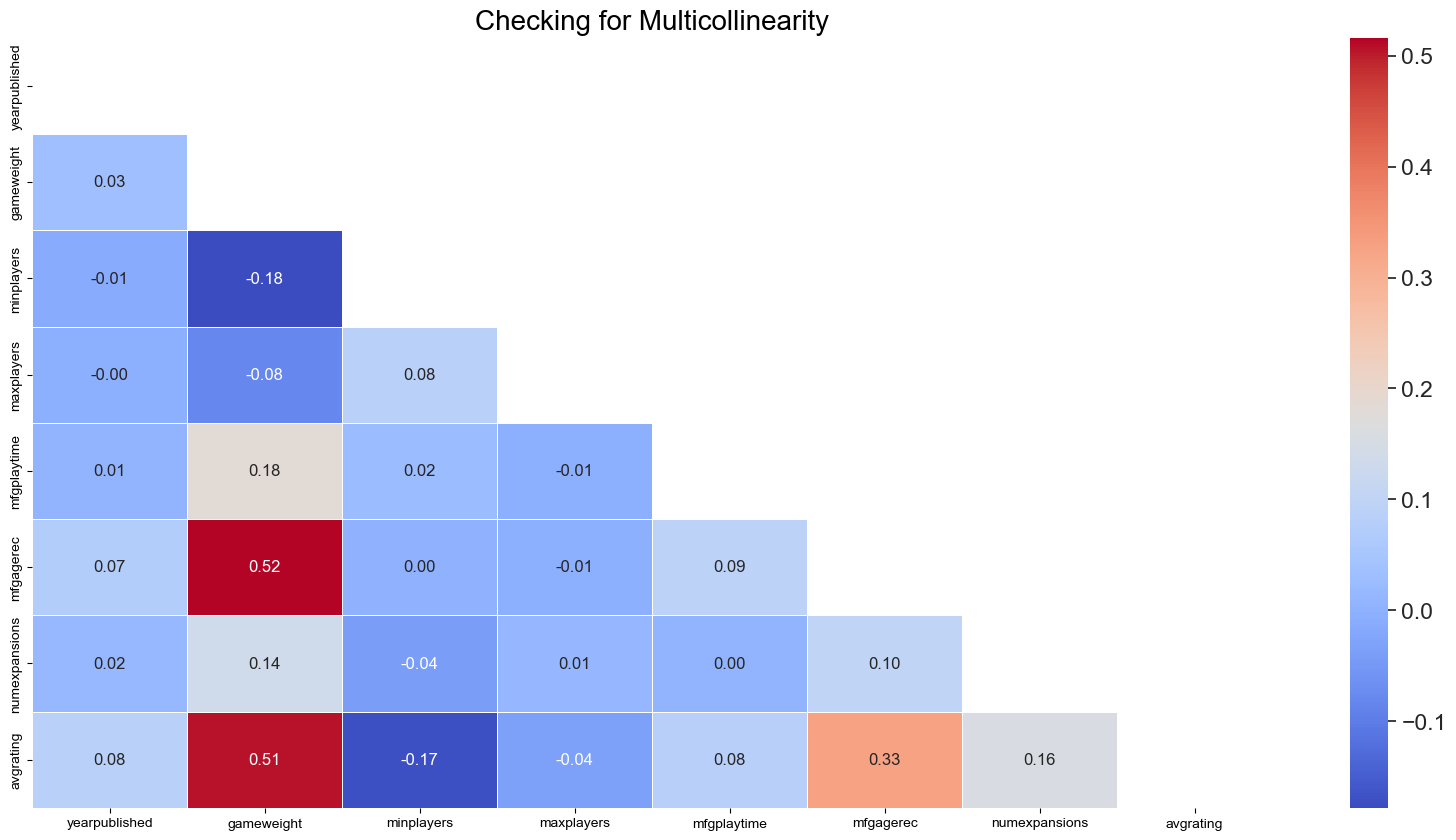

In [153]:
mask = np.zeros_like(corr_matrix)
mask[np.triu_indices_from(mask)] = True # optional, to hide repeat half of the matrix

f, ax = plt.subplots(figsize=(20, 10))
sns.set(font_scale=1.5) # increase font size

ax = sns.heatmap(corr_matrix, mask=mask, annot=True, annot_kws={"size": 12}, linewidths=.5, cmap="coolwarm", fmt=".2f", ax=ax) # round to 2 decimal places
ax.set_title("Checking for Multicollinearity", fontsize=20) # add title
plt.show()

In [155]:
binary_columns = [col for col in df_columns if df[col].nunique() <= 2]

In [157]:
binary_df = df[binary_columns]

### Checking for perfect multicolinearity for the binary/categorical features:

In [160]:
corr_binary = binary_df.corr().round(3)

In [161]:
perfect_corr = (corr_binary == 1) | (corr_binary == -1)
perfect_corr_counts = perfect_corr.sum(axis=0)
features_with_multiple_ones = perfect_corr_counts[perfect_corr_counts > 1].index
filtered_corr = corr_binary.loc[features_with_multiple_ones, features_with_multiple_ones]
print(filtered_corr)

Empty DataFrame
Columns: []
Index: []


In [164]:
perfect_corr_counts.nunique()

1

No perfect multicolinearity detected - no redundant categories

In [167]:
binary_df.corrwith(target).sort_values(ascending=False)[:5] #top5 categorical variables with positive correlations with the target:

kickstarted               0.221179
solo_/_solitaire_game     0.215640
cat:strategy              0.209023
variable_player_powers    0.199896
miniatures                0.191977
dtype: float64

In [169]:
binary_df.corrwith(target).sort_values(ascending=True)[:5] #top5 variables with negative correlations with the target:

roll_/_spin_and_move   -0.262823
cat:childrens          -0.202974
dexterity              -0.109150
electronic             -0.073440
card_game              -0.068654
dtype: float64

What happens with our metrics if we train the model only with the 'non-binary' variables?

In [172]:
#X-Y split again:
X_non_binary = non_binary_df.drop(columns=["avgrating"])
y = non_binary_df["avgrating"]

In [174]:
X_train_non_binary, X_test_non_binary, y_train_non_binary, y_test_non_binary = train_test_split(X_non_binary, y, test_size=0.3, random_state=42)

In [176]:
results_non_binary, predictions_non_binary = compare_models(X_train_non_binary, X_test_non_binary, y_train_non_binary, y_test_non_binary)

In [178]:
results_non_binary

,R2,RMSE (Test),RMSE (Train),MSE (Test),MAE (Test)
Model,,,,,
Linear Regression,0.285503,0.780424,0.771590,0.609061,0.595952
Ridge Regression,0.285503,0.780423,0.771590,0.609061,0.595952
Lasso Regression,0.020348,0.913831,0.901084,0.835088,0.709311
Decision Tree,0.005466,0.920746,0.088512,0.847774,0.694605
KNN Regression,0.364840,0.735820,0.583299,0.541431,0.550131
XGBoost Regression,0.487748,0.660803,0.634746,0.436660,0.493437


When working with all the columns we have better metrics (also, when looking at the correlation matrix, many of the top10 correlators with our target were categorical features):

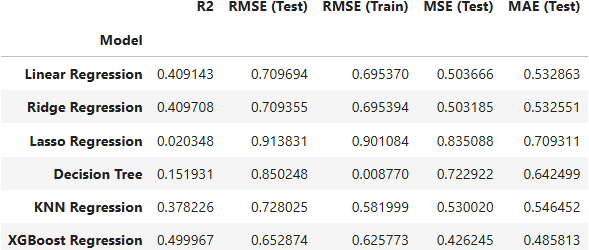

### Trying to improve the models by normalizing the data:

In [184]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import xgboost as xgb
from xgboost import XGBRFRegressor

def compare_models_with_scaling(X_train, X_test, y_train, y_test):
    scalers = {
        "MinMaxScaler": MinMaxScaler(),
        "StandardScaler": StandardScaler()
    }
    
    results_combined = []

    for scaler_name, scaler in scalers.items():
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        
        results_df, _ = compare_models(X_train_scaled, X_test_scaled, y_train, y_test)
        
        results_df["Scaler"] = scaler_name
        
        results_combined.append(results_df)
    
    final_results_df = pd.concat(results_combined, axis=0).reset_index()
    return final_results_df

In [186]:
results_scaling_df = compare_models_with_scaling(X_train, X_test, y_train, y_test)

In [187]:
desired_order = [
    'Linear Regression',
    'Ridge Regression',
    'Lasso Regression',
    'Decision Tree',
    'KNN Regression',
    'XGBoost Regression'
]

results_scaling_df['Model'] = pd.Categorical(results_scaling_df['Model'], categories=desired_order, ordered=True)
results_scaling_df = results_scaling_df.sort_values(['Model', 'Scaler']).set_index(['Scaler', 'Model'])

In [190]:
results_scaling_df

,,R2,RMSE (Test),RMSE (Train),MSE (Test),MAE (Test)
Scaler,Model,,,,,
MinMaxScaler,Linear Regression,0.409143,0.709694,0.695370,0.503666,0.532863
StandardScaler,Linear Regression,0.409143,0.709694,0.695370,0.503666,0.532863
MinMaxScaler,Ridge Regression,0.409076,0.709734,0.695461,0.503723,0.532981
StandardScaler,Ridge Regression,0.409144,0.709694,0.695370,0.503666,0.532863
MinMaxScaler,Lasso Regression,-0.000899,0.923688,0.908326,0.853199,0.716904
StandardScaler,Lasso Regression,-0.000899,0.923688,0.908326,0.853199,0.716904
MinMaxScaler,Decision Tree,0.146805,0.852814,0.008770,0.727292,0.642966
StandardScaler,Decision Tree,0.130891,0.860731,0.008770,0.740858,0.649054
MinMaxScaler,KNN Regression,0.319740,0.761496,0.619142,0.579876,0.579677


With no scaling is better (although is the same for XGBoost):

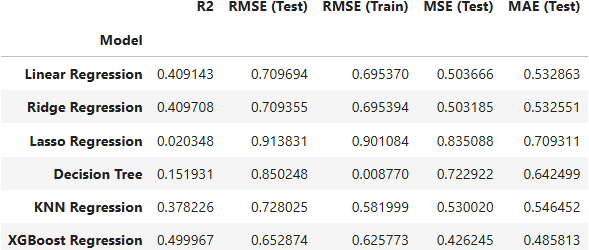

### Trying Log Transform on some variables:

Variables to transform (continuous & right-skewed):
"maxplayers"
"mfgplaytime"
"numexpansions"

In [195]:
log_transform_vars = ['maxplayers', 'mfgplaytime', 'numexpansions']

df_log = df.copy()

for col in log_transform_vars:
    if col in df_log.columns:
        df_log[col] = np.log1p(df_log[col])

In [197]:
# I also want to logtransform the "yearpublished" variable, but first I have to flip it to be right skewed:
constant = df_log['yearpublished'].max() + 1
df_log['yearpublished_reflected'] = constant - df_log['yearpublished']
df_log['yearpublished_log'] = np.log1p(df_log['yearpublished_reflected'])

In [199]:
df_log.drop(columns=['yearpublished', 'yearpublished_reflected'], inplace=True)

In [201]:
X_log = df_log.drop(columns=["avgrating"])
y_log = df_log["avgrating"]

In [203]:
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X_log, y_log, test_size=0.3, random_state=42)

In [205]:
results_log, predictions_log = compare_models(X_train_log, X_test_log, y_train_log, y_test_log)

In [207]:
results_log

,R2,RMSE (Test),RMSE (Train),MSE (Test),MAE (Test)
Model,,,,,
Linear Regression,0.495637,0.655695,0.640955,0.429936,0.481963
Ridge Regression,0.495970,0.655478,0.640972,0.429652,0.481733
Lasso Regression,-0.000899,0.923688,0.908326,0.853199,0.716904
Decision Tree,0.152319,0.850054,0.008770,0.722592,0.640987
KNN Regression,0.428397,0.698036,0.556562,0.487254,0.528672
XGBoost Regression,0.500504,0.652523,0.625664,0.425787,0.485471


The log transformation of some features improved the performance of the majority of the models. We will keep it.

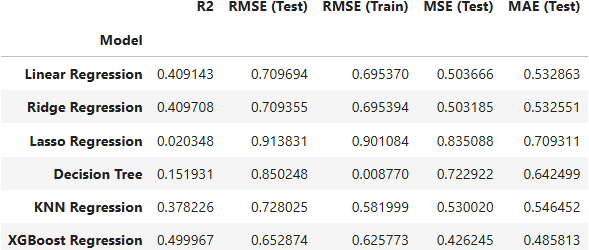

In [210]:
df_log.describe()

,gameweight,minplayers,maxplayers,mfgplaytime,mfgagerec,numexpansions,kickstarted,cat:thematic,cat:strategy,cat:war,cat:family,cat:cgs,cat:abstract,cat:party,cat:childrens,exploration,miniatures,territory_building,card_game,educational,puzzle,collectible_components,word_game,print_&_play,electronic,alliances,area_majority_/_influence,auction/bidding,dice_rolling,hand_management,simultaneous_action_selection,trick-taking,hexagon_grid,once-per-game_abilities,set_collection,tile_placement,action_points,investment,market,square_grid,stock_holding,victory_points_as_a_resource,enclosure,pattern_building,pattern_recognition,modular_board,network_and_route_building,point_to_point_movement,melding_and_splaying,negotiation,trading,push_your_luck,income,race,random_production,variable_set-up,roll_/_spin_and_move,variable_player_powers,action_queue,bias,grid_movement,lose_a_turn,programmed_movement,scenario_/_mission_/_campaign_game,voting,events,paper-and-pencil,player_elimination,role_playing,movement_points,simulation,variable_phase_order,area_movement,commodity_speculation,cooperative_game,deduction,sudden_death_ending,connections,highest-lowest_scoring,betting_and_bluffing,memory,score-and-reset_game,layering,map_addition,secret_unit_deployment,increase_value_of_unchosen_resources,ratio_/_combat_results_table,take_that,team-based_game,campaign_/_battle_card_driven,tech_trees_/_tech_tracks,player_judge,chit-pull_system,three_dimensional_movement,action_drafting,minimap_resolution,stat_check_resolution,action_timer,pick-up_and_deliver,map_deformation,bingo,crayon_rail_system,multiple_maps,hidden_roles,line_drawing,tug_of_war,pattern_movement,static_capture,different_dice_movement,chaining,ladder_climbing,predictive_bid,solo_/_solitaire_game,line_of_sight,critical_hits_and_failures,interrupts,zone_of_control,bribery,end_game_bonuses,area-impulse,worker_placement,measurement_movement,map_reduction,real-time,resource_to_move,mancala,ownership,kill_steal,hidden_movement,track_movement,deck_construction,drafting,tableaubuilding,prisoner's_dilemma,hidden_victory_points,movement_template,slide/push,targeted_clues,command_cards,grid_coverage,relative_movement,action/event,card_play_conflict_resolution,"i_cut,_you_choose",die_icon_resolution,elapsed_real_time_ending,advantage_token,storytelling,catch_the_leader,roles_with_asymmetric_information,traitor_game,moving_multiple_units,semi-cooperative_game,communication_limits,time_track,speed_matching,cube_tower,re-rolling_and_locking,impulse_movement,loans,delayed_purchase,"deck,_bag,_and_pool_building",move_through_deck,single_loser_game,matching,induction,physical_removal,narrative_choice_/_paragraph,pieces_as_map,follow,finale_ending,order_counters,contracts,passed_action_token,king_of_the_hill,action_retrieval,force_commitment,rondel,automatic_resource_growth,legacy_game,dexterity,physical,avgrating,yearpublished_log
count,19504.000000,19504.000000,19504.000000,19504.000000,19504.000000,19504.000000,19504.000000,19504.000000,19504.000000,19504.000000,19504.000000,19504.000000,19504.000000,19504.000000,19504.000000,19504.000000,19504.000000,19504.000000,19504.000000,19504.000000,19504.000000,19504.000000,19504.000000,19504.000000,19504.000000,19504.000000,19504.000000,19504.000000,19504.000000,19504.000000,19504.000000,19504.000000,19504.000000,19504.000000,19504.000000,19504.000000,19504.000000,19504.000000,19504.000000,19504.000000,19504.000000,19504.000000,19504.000000,19504.000000,19504.000000,19504.000000,19504.000000,19504.000000,19504.000000,19504.000000,19504.000000,19504.000000,19504.000000,19504.00000,19504.000000,19504.000000,19504.000000,19504.000000,19504.000000,19504.000000,19504.000000,19504.000000,19504.000000,19504.000000,19504.000000,19504.000000,19504.000000,19504.000000,19504.000000,19504.000000,19504.000000,19504.000000,19504.000000,19504.000000,19504.000000,19504.000000,19504.000000,19504.000000,19504.000000,19504.000000,19504.000000,19504.000000,19504.000000,19504.000000,1

Let's look at the distribution of our log transformed numeric continuous variables and the target (not transformed)

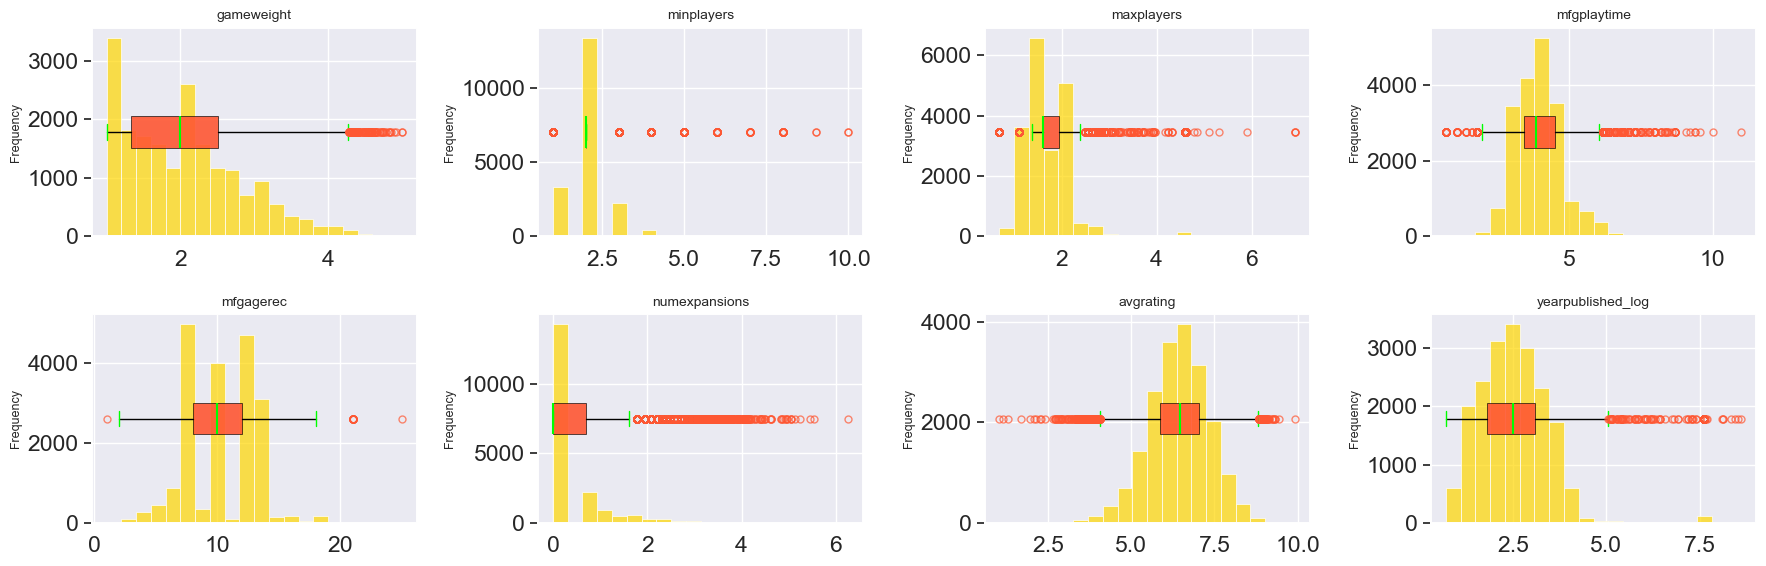

In [213]:
df_log_columns = df_log.columns.tolist()
non_binary_log_columns = [col for col in df_log_columns if df_log[col].nunique() > 2]

# Define grid layout
ncols = 4
nrows = -(-len(non_binary_log_columns) // ncols)  # Calculate rows (ceil division)
fig, axes = plt.subplots(nrows, ncols, figsize=(18, nrows * 3))
axes = axes.flatten()  # Flatten axes for easy iteration


# Plot each numerical column
for i, col in enumerate(non_binary_log_columns):
    # Plot histogram
    sns.histplot(df_log[col], kde=False, bins=20, color="gold", ax=axes[i], alpha=0.7, linewidth=0.5)
    axes[i].set_xlabel("")
    # Overlay horizontal boxplot
    box_ax = axes[i].twinx()  # Create a twin y-axis for the boxplot
    box_ax.boxplot(
        df_log[col],
        vert=False,  # Horizontal boxplot
        patch_artist=True, 
        boxprops=dict(facecolor='#FF5733', color='black', alpha=0.9, linewidth=0.5),  # Neon green box
        medianprops=dict(color='lime', linewidth=1.5),  # Yellow median line
        whiskerprops=dict(color='black'), 
        capprops=dict(color='lime', linewidth=1), 
        flierprops=dict(
            marker='o',  # Marker style for outliers
            color='#FF5733',  # Fill color of outliers
            markeredgecolor="#FF5733",  # Border color of outliers
            alpha=0.7,
            markersize=5  # Size of outliers
        )
    )
    
   # Adjust boxplot to center vertically on histogram
    y_hist_max = axes[i].get_ylim()[1]  # Get the maximum y-axis value of the histogram
    boxplot_center = y_hist_max / 2

    # Remove the twin y-axis ticks and labels
    box_ax.set_yticks([])  # Hide the right-side y-axis ticks
    box_ax.get_yaxis().set_visible(False)  # Completely hide the y-axis
    
    # Set titles and labels
    axes[i].set_title(f"{col}", fontsize=10)
    axes[i].set_ylabel("Frequency", fontsize=9)

# Turn off unused subplots
for j in range(len(non_binary_columns), len(axes)):
    axes[j].axis("off")

plt.tight_layout()
plt.show()

In [217]:
# Trying to deal with outliers for these variables
def outlier_slayer(data): 
    """
    Automatically removes outliers based on Q1, Q3
    """
    for col in data:
        if data[col].nunique() > 2 and col != "avgrating":
            Q1 = data[col].quantile(0.25)
            Q3 = data[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]
    return data

In [219]:
without_out = outlier_slayer(df_log)

In [221]:
without_out.shape

(8390, 184)

In [223]:
X_without_out = without_out.drop(columns=["avgrating"])
y_without_out = without_out["avgrating"]

In [225]:
X_train_without_out, X_test_without_out, y_train_without_out, y_test_without_out = train_test_split(X_without_out, y_without_out, test_size=0.3, random_state=42)

In [227]:
import xgboost as xgb
from xgboost import XGBRFRegressor
results_without_out, predictions_without_out = compare_models(X_train_without_out, X_test_without_out, y_train_without_out, y_test_without_out)
results_without_out

,R2,RMSE (Test),RMSE (Train),MSE (Test),MAE (Test)
Model,,,,,
Linear Regression,0.466688,0.627436,0.609953,0.393676,0.474629
Ridge Regression,0.472073,0.624260,0.610221,0.389700,0.472407
Lasso Regression,-0.001411,0.859775,0.862100,0.739213,0.675494
Decision Tree,-0.022443,0.868757,0.006378,0.754738,0.653387
KNN Regression,0.356414,0.689258,0.569375,0.475077,0.536573
XGBoost Regression,0.467621,0.626887,0.594498,0.392987,0.476165


Ok, it didn't improve the models!!

## Evaluating the performance of the models overall - after log transformation:

In [231]:
predictions_log

{'Linear Regression': array([6.70467985, 5.92916454, 7.18161262, ..., 6.32377886, 7.14779019,
        6.04432518]),
 'Ridge Regression': array([6.70152384, 5.92989964, 7.18144113, ..., 6.32265735, 7.14937034,
        6.04437402]),
 'Lasso Regression': array([6.43612523, 6.43612523, 6.43612523, ..., 6.43612523, 6.43612523,
        6.43612523]),
 'Decision Tree': array([7.97287, 6.42356, 8.04214, ..., 6.67095, 6.66802, 5.12545]),
 'KNN Regression': array([6.992542, 6.053394, 7.128794, ..., 6.208538, 6.533558, 6.376384]),
 'XGBoost Regression': array([7.401601 , 6.1309147, 7.313741 , ..., 6.134964 , 7.182948 ,
        6.0904255], dtype=float32)}

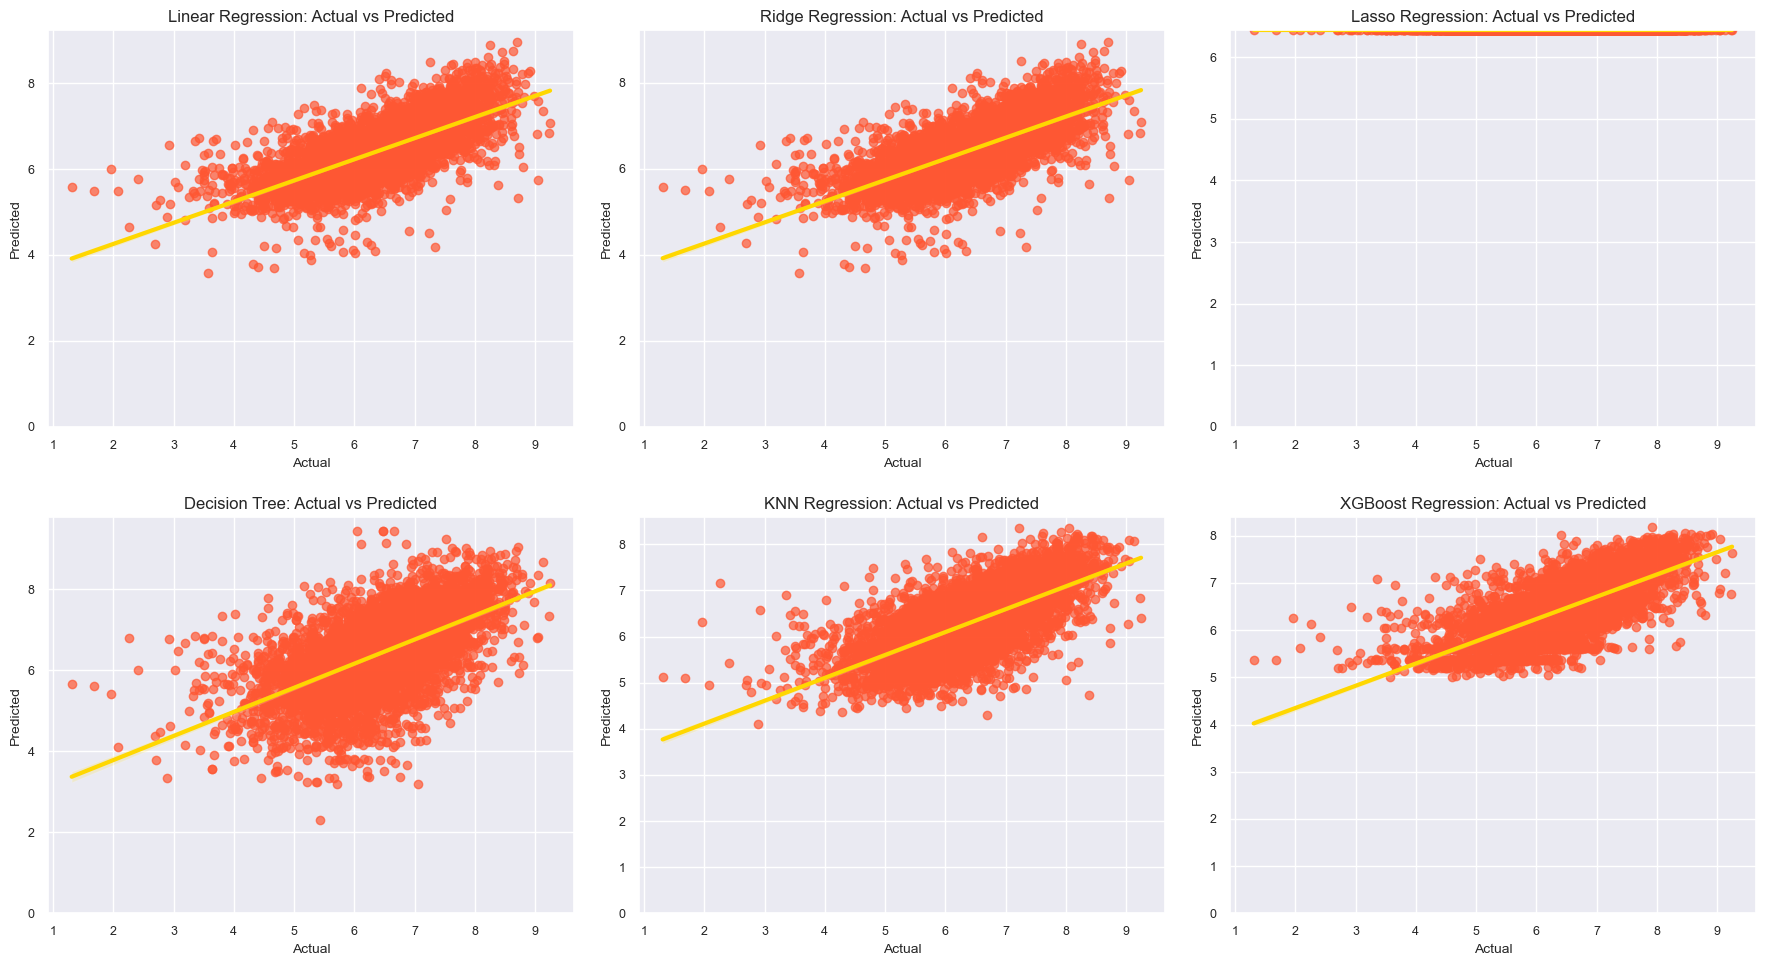

In [233]:
ncols = 3  # Number of plots per row
nrows = -(-len(predictions_log) // ncols)  # Calculate the number of rows using ceiling division

# Create a grid of subplots
fig, axes = plt.subplots(nrows, ncols, figsize=(18, nrows * 5))  # Adjust height for better readability
axes = axes.flatten()  # Flatten axes for easy iteration

# Generate scatter plots for each model
for i, (model_name, predictions_test) in enumerate(predictions_log.items()):
    eval_df = pd.DataFrame({
        "actual": y_test_log,
        "pred": predictions_test
    })
    scatter_color = '#FF5733'
    line_color = "gold"

    # Plot on the current axis
    sns.regplot(
        x='actual',
        y='pred',
        data=eval_df,
        scatter_kws={"color": scatter_color, "alpha": 0.7},
        line_kws={"color": line_color, "linewidth": 3},
        ax=axes[i]
    )

    axes[i].set_ylim(bottom=0)
    
    # Set plot titles and labels
    axes[i].set_title(f'{model_name}: Actual vs Predicted', fontsize=12)
    axes[i].set_xlabel('Actual', fontsize=10)
    axes[i].set_ylabel('Predicted', fontsize=10)
    axes[i].tick_params(axis='both', labelsize=9)

# Turn off unused subplots
for j in range(len(predictions_log), len(axes)):
    axes[j].axis("off")

# Adjust layout
plt.tight_layout()
plt.show()

## Trying to tune hyperparameters of the best model - XGBoost with log transformed data

In [236]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

xgb = XGBRegressor(random_state=42)

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
}

grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, verbose=1)

grid_search.fit(X_train_log, y_train_log)
grid_predictions = grid_search.predict(X_test_log)
# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.05, 'max_depth': 7, 'n_estimators': 300, 'subsample': 0.8}
Best Score: -0.359486299006847


In [239]:
best_model = grid_search.best_estimator_
y_pred_best_model = best_model.predict(X_test_log)
r2_xgb = r2_score(y_test_log, y_pred_best_model)
RMSE_xgb = mean_squared_error(y_test_log, y_pred_best_model, squared=False) #root mean squared error
MSE_xgb = mean_squared_error(y_test_log, y_pred_best_model)
MAE_xgb = mean_absolute_error(y_test_log, y_pred_best_model)
predictions_xgb_training = best_model.predict(X_train_log)
RMSE_xgb_training = mean_squared_error(y_train_log, predictions_xgb_training, squared=False)

print("Test MSE:", MSE_xgb)
print("Test R-squared:", r2_xgb)
print("Test RMSE:", RMSE_xgb)
print("Test MAE:", MAE_xgb)
print("Training R-squared:", MAE_xgb)

Test MSE: 0.36672648254227647
Test R-squared: 0.5697885598744732
Test RMSE: 0.6055794601390279
Test MAE: 0.4463752801902312
Training R-squared: 0.4463752801902312


In [241]:
eval_df_best_xgb = pd.DataFrame({
    "actual": y_test_log,
    "pred": y_pred_best_model
})

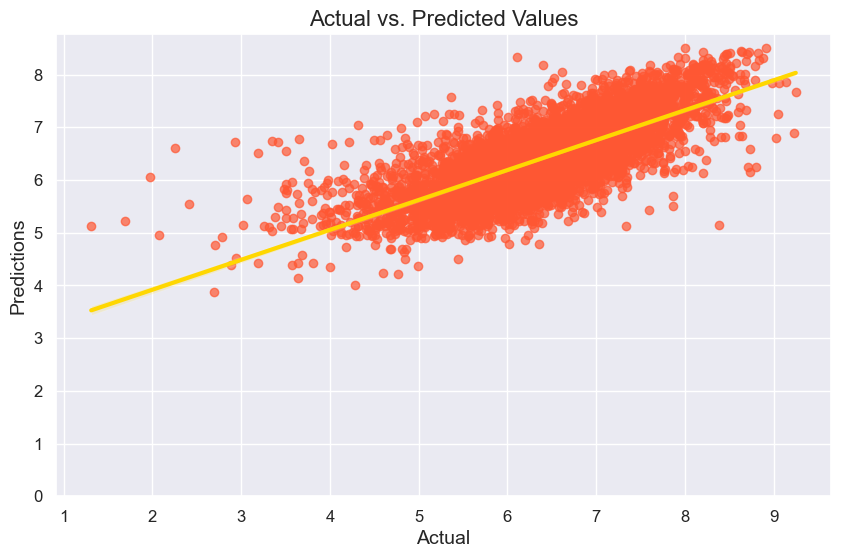

In [243]:
scatter_color = '#FF5733'
line_color = "gold"

plt.figure(figsize=(10, 6))

sns.regplot(x='actual', y='pred', data=eval_df_best_xgb,
            scatter_kws={"color": scatter_color, "alpha": 0.7},
            line_kws={"color": line_color, "linewidth": 3})

plt.ylim(bottom=0)
plt.title('Actual vs. Predicted Values', fontsize=16)
plt.xlabel('Actual', fontsize=14)
plt.ylabel('Predictions', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

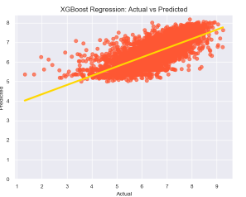

On the best_parameters:
n_estimators = 300: let's try increasing this, since we are not yet overfitting
max_depth = 7: same, let's increase a bit and compare the results
learning_rate=0.05 - maybe keep it since it was better suited than bigger or smaller learning rate. But if we test with bigger n_estimators and max_depth, let's consider checking for a smaller learning_rate as well.
subsample=0.8: consider checking for lower values also, if increase n_estimators and max_depth
colsample_bytree = 0.8 - same as above.

In [247]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

xgb = XGBRegressor(random_state=42)

param_grid_higher = {
    'n_estimators': [300, 500, 700],
    'max_depth': [7, 9, 11],
    'learning_rate': [0.01, 0.05],
    'subsample': [0.6, 0.8],
    'colsample_bytree': [0.6, 0.8]
}

grid_search_higher = GridSearchCV(estimator=xgb, param_grid=param_grid_higher, scoring='neg_mean_squared_error', cv=5, verbose=1)

grid_search_higher.fit(X_train_log, y_train_log)
grid_predictions_higher = grid_search_higher.predict(X_test_log)
# Best parameters and score
print("Best Parameters:", grid_search_higher.best_params_)
print("Best Score:", grid_search_higher.best_score_)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Parameters: {'colsample_bytree': 0.6, 'learning_rate': 0.01, 'max_depth': 9, 'n_estimators': 700, 'subsample': 0.6}
Best Score: -0.3576203886450357


Best Parameters: {'colsample_bytree': 0.6, 'learning_rate': 0.01, 'max_depth': 9, 'n_estimators': 700, 'subsample': 0.6}

In [250]:
best_model_higher = grid_search_higher.best_estimator_
y_pred_best_model_higher = best_model_higher.predict(X_test_log)
r2_xgb_higher = r2_score(y_test_log, y_pred_best_model_higher)
RMSE_xgb_higher = mean_squared_error(y_test_log, y_pred_best_model_higher, squared=False) #root mean squared error
MSE_xgb_higher = mean_squared_error(y_test_log, y_pred_best_model_higher)
MAE_xgb_higher = mean_absolute_error(y_test_log, y_pred_best_model_higher)
predictions_xgb_training_higher = best_model_higher.predict(X_train_log)
RMSE_xgb_training_higher = mean_squared_error(y_train_log, predictions_xgb_training_higher, squared=False)

print("Test MSE:", MSE_xgb_higher)
print("Test R-squared:", r2_xgb_higher)
print("Test RMSE:", RMSE_xgb_higher)
print("Test MAE:", MAE_xgb_higher)
print("Training R-squared:", MAE_xgb_higher)

Test MSE: 0.36630906076789527
Test R-squared: 0.5702782425978243
Test RMSE: 0.6052347154351734
Test MAE: 0.44481744809362544
Training R-squared: 0.44481744809362544


In [252]:
eval_df_best_xgb = pd.DataFrame({
    "actual": y_test_log,
    "pred": y_pred_best_model_higher
})

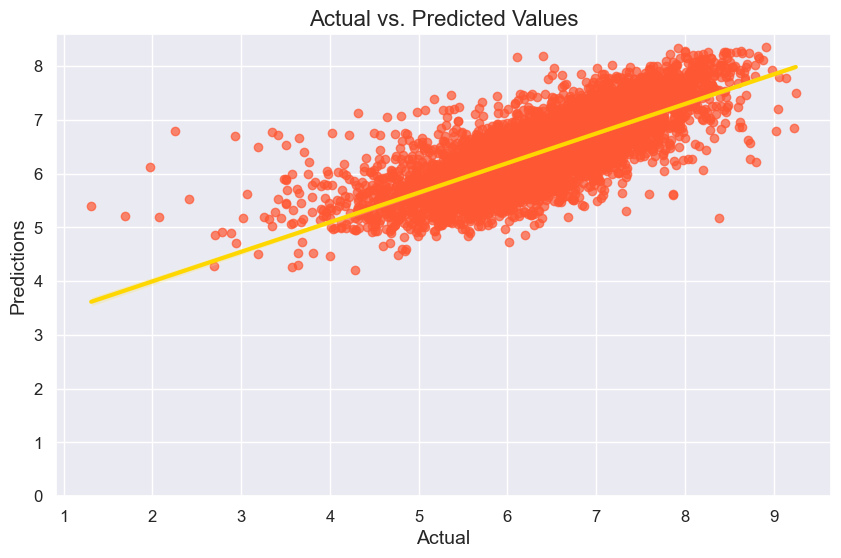

In [254]:
scatter_color = '#FF5733'
line_color = "gold"

plt.figure(figsize=(10, 6))

sns.regplot(x='actual', y='pred', data=eval_df_best_xgb,
            scatter_kws={"color": scatter_color, "alpha": 0.7},
            line_kws={"color": line_color, "linewidth": 3})

plt.ylim(bottom=0)
plt.title('Actual vs. Predicted Values', fontsize=16)
plt.xlabel('Actual', fontsize=14)
plt.ylabel('Predictions', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

Not much of a difference..

In [257]:
feature_importance_xgb = pd.Series(best_model.feature_importances_, index=X_log.columns).sort_values(ascending=False)

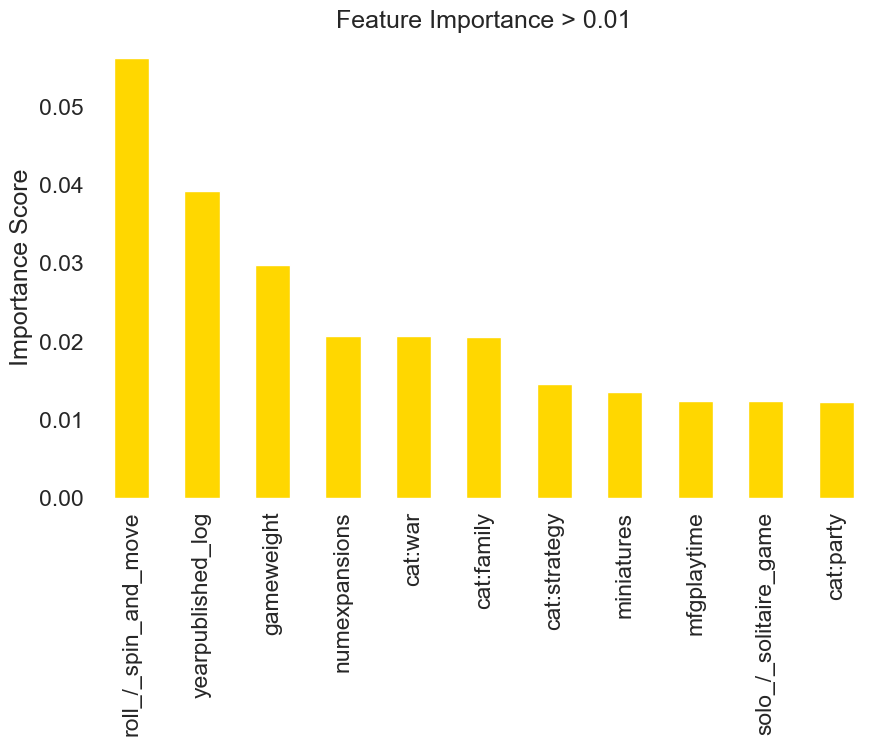

In [265]:
top_features = feature_importance_xgb[feature_importance_xgb > 0.01]
top_features.plot(kind='bar', title="Feature Importance > 0.01", figsize=(10, 6), color='gold')
plt.ylabel("Importance Score")
plt.grid(False) 
plt.box(False)
plt.show()

In [267]:
top_features

roll_/_spin_and_move     0.056184
yearpublished_log        0.039211
gameweight               0.029830
numexpansions            0.020747
cat:war                  0.020723
cat:family               0.020659
cat:strategy             0.014618
miniatures               0.013529
mfgplaytime              0.012380
solo_/_solitaire_game    0.012365
cat:party                0.012338
dtype: float32

### Testing the model using only the most important features to predict our target:

In [271]:
important_features = feature_importance_xgb[feature_importance_xgb > 0.01].index
X_train_reduced = X_train_log[important_features]
X_test_reduced = X_test_log[important_features]

In [275]:
best_model_reduced = XGBRegressor(
    n_estimators=300,
    max_depth=7,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)
best_model_reduced.fit(X_train_reduced, y_train_log)
best_reduced_predictions = best_model_reduced.predict(X_test_reduced)

In [277]:
r2_xgb = r2_score(y_test_log, best_reduced_predictions)
RMSE_xgb = mean_squared_error(y_test_log, best_reduced_predictions, squared=False) #root mean squared error
MSE_xgb = mean_squared_error(y_test_log, best_reduced_predictions)
MAE_xgb = mean_absolute_error(y_test_log, best_reduced_predictions)
predictions_xgb_training = best_model_reduced.predict(X_train_reduced)
RMSE_xgb_training = mean_squared_error(y_train_log, predictions_xgb_training, squared=False)

print("Test MSE:", MSE_xgb)
print("Test R-squared:", r2_xgb)
print("Test RMSE:", RMSE_xgb)
print("Test MAE:", MAE_xgb)
print("Training R-squared:", MAE_xgb)

Test MSE: 0.41034970269139487
Test R-squared: 0.518613612722677
Test RMSE: 0.6405854374643517
Test MAE: 0.47480395929337854
Training R-squared: 0.47480395929337854


In [279]:
import xgboost as xgb
from xgboost import XGBRFRegressor
results_df, _ = compare_models(X_train_reduced, X_test_reduced, y_train_log, y_test_log)

In [281]:
results_df

,R2,RMSE (Test),RMSE (Train),MSE (Test),MAE (Test)
Model,,,,,
Linear Regression,0.471864,0.670970,0.662049,0.450200,0.494926
Ridge Regression,0.471859,0.670973,0.662049,0.450205,0.494926
Lasso Regression,-0.000899,0.923688,0.908326,0.853199,0.716904
Decision Tree,0.140203,0.856107,0.264745,0.732919,0.650561
KNN Regression,0.450798,0.684221,0.556453,0.468158,0.511274
XGBoost Regression,0.501207,0.652064,0.629137,0.425188,0.485122


Our model performs better if we work with all the features.

### Looking at the distributions of the most important deatures to predict Average Rating:

In [284]:
X_reduced = X_log[important_features]

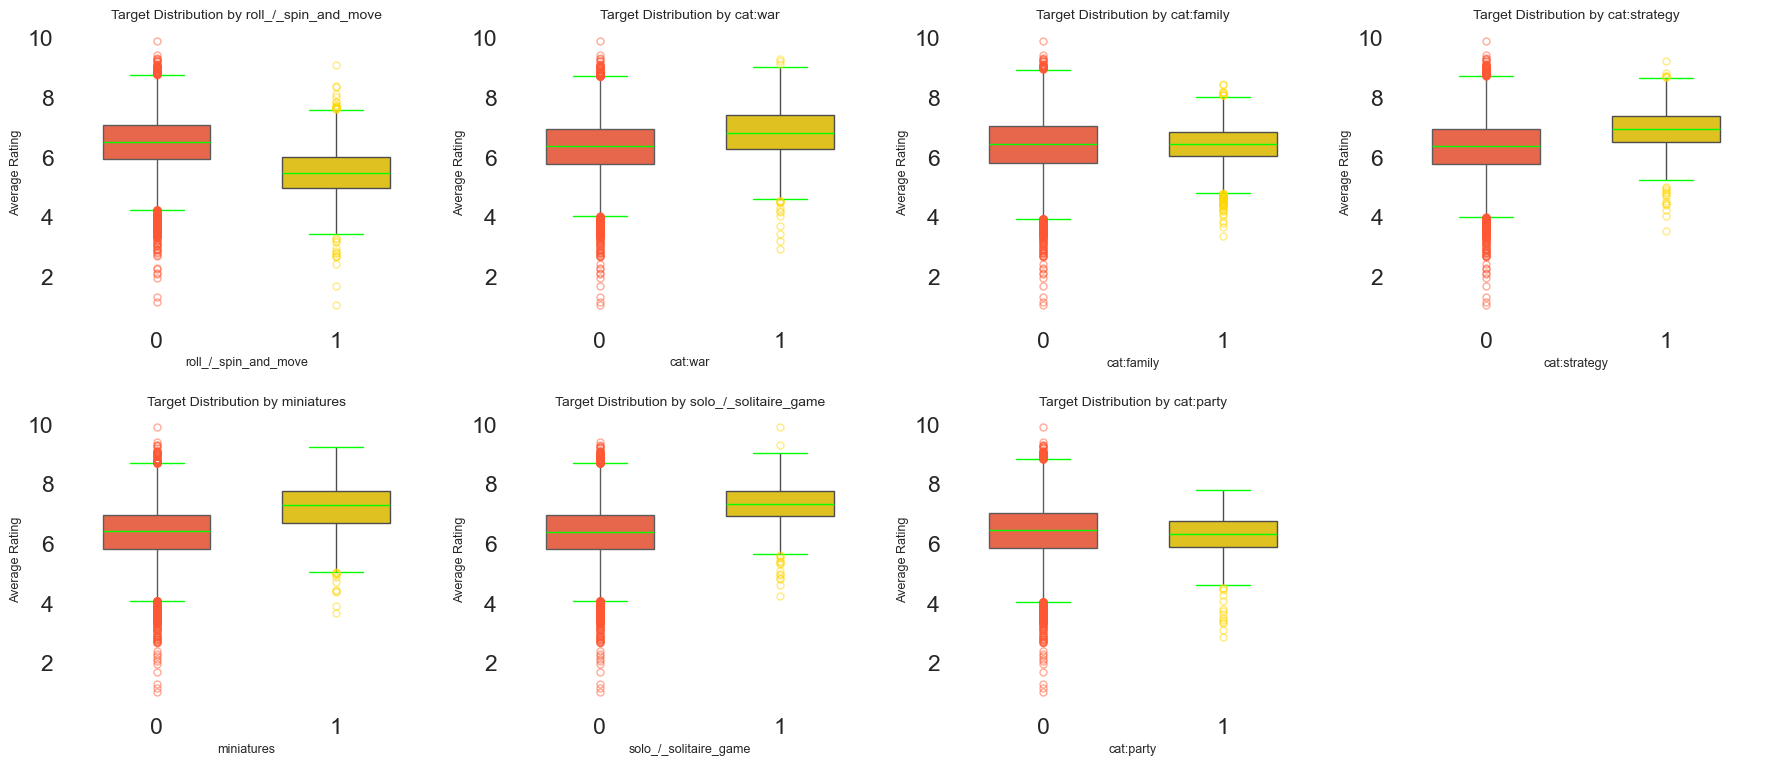

In [286]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter categorical features
categorical_features = [
    col for col in feature_importance_xgb.index 
    if col in X_reduced.columns and X_reduced[col].nunique() <= 2
]

# Define grid layout
ncols = 4
nrows = -(-len(categorical_features) // ncols)  # Ceiling division
fig, axes = plt.subplots(nrows, ncols, figsize=(18, nrows * 4))
axes = axes.flatten()  # Flatten axes for easy iteration

grouped_data = X_reduced.copy()
grouped_data['avgrating'] = y_log  # Add target to the dataset

# Create custom boxplots
for i, feature in enumerate(categorical_features):
    if feature in X_reduced.columns:
        # Create boxplot for category 0
        sns.boxplot(
            x=grouped_data[grouped_data[feature] == 0][feature],
            y=grouped_data[grouped_data[feature] == 0]['avgrating'],
            palette=["#FF5733"],
            medianprops=dict(color='lime'),
            capprops=dict(color='lime'), 
            ax=axes[i],
            width=0.6,
            flierprops=dict(
                marker='o',
                color='#FF5733',
                markeredgecolor='#FF5733',
                alpha=0.5,
                markersize=5
            )
        )

        # Create boxplot for category 1
        sns.boxplot(
            x=grouped_data[grouped_data[feature] == 1][feature],
            y=grouped_data[grouped_data[feature] == 1]['avgrating'],
            palette=["gold"],
            medianprops=dict(color='lime'),
            capprops=dict(color='lime'), 
            ax=axes[i],
            width=0.6,
            flierprops=dict(
                marker='o',
                color='gold',
                markeredgecolor='gold',
                alpha=0.5,
                markersize=5
            )
        )

        # Remove grid and set white background
        axes[i].grid(False)
        axes[i].set_facecolor('white')

        # Set titles and labels
        axes[i].set_title(f"Target Distribution by {feature}", fontsize=10)
        axes[i].set_xlabel(feature, fontsize=9)
        axes[i].set_ylabel("Average Rating", fontsize=9)

    else:
        # Turn off the axis if no feature is present
        axes[i].axis("off")

# Turn off any unused subplots
for j in range(len(categorical_features), len(axes)):
    axes[j].axis("off")

plt.tight_layout()
plt.show()


In [288]:
df.yearpublished.describe()

count    19504.000000
mean      1991.159967
std        181.301149
min      -3500.000000
25%       2001.000000
50%       2011.000000
75%       2017.000000
max       2021.000000
Name: yearpublished, dtype: float64

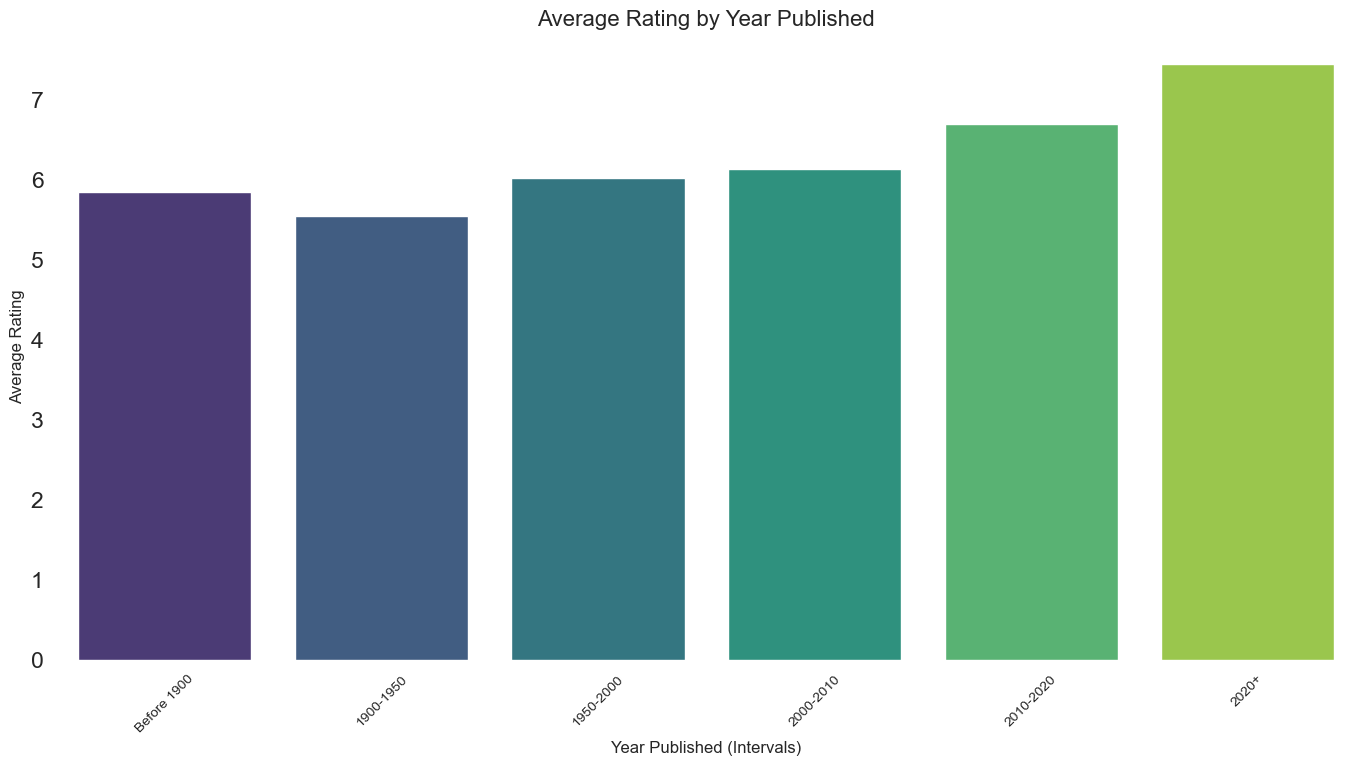

In [290]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define bins for yearpublished intervals
bins = [-4000, 1900, 1950, 2000, 2010, 2020, 2025]  # Define interval edges
labels = ['Before 1900', '1900-1950', '1950-2000', '2000-2010', '2010-2020', '2020+']  # Labels for each bin

# Create a new column for yearpublished intervals
df['yearpublished_bin'] = pd.cut(df['yearpublished'], bins=bins, labels=labels, include_lowest=True)

# Group by the yearpublished_bin and calculate the average rating
yearpublished_avg_rating = df.groupby('yearpublished_bin')['avgrating'].mean().reset_index()

# Create the bar plot
plt.figure(figsize=(14, 8))
sns.barplot(
    x='yearpublished_bin', 
    y='avgrating', 
    data=yearpublished_avg_rating, 
    palette="viridis"
)

# Add labels and title
plt.xlabel("Year Published (Intervals)", fontsize=12)
plt.ylabel("Average Rating", fontsize=12)
plt.title("Average Rating by Year Published", fontsize=16)
plt.xticks(rotation=45, fontsize=10)  # Rotate x-axis labels for better readability
plt.grid(False) 
plt.box(False)
plt.tight_layout()
plt.show()


In [292]:
df.gameweight.describe()

count    19504.000000
mean         2.017103
std          0.791153
min          1.000000
25%          1.333300
50%          2.000000
75%          2.511450
max          5.000000
Name: gameweight, dtype: float64

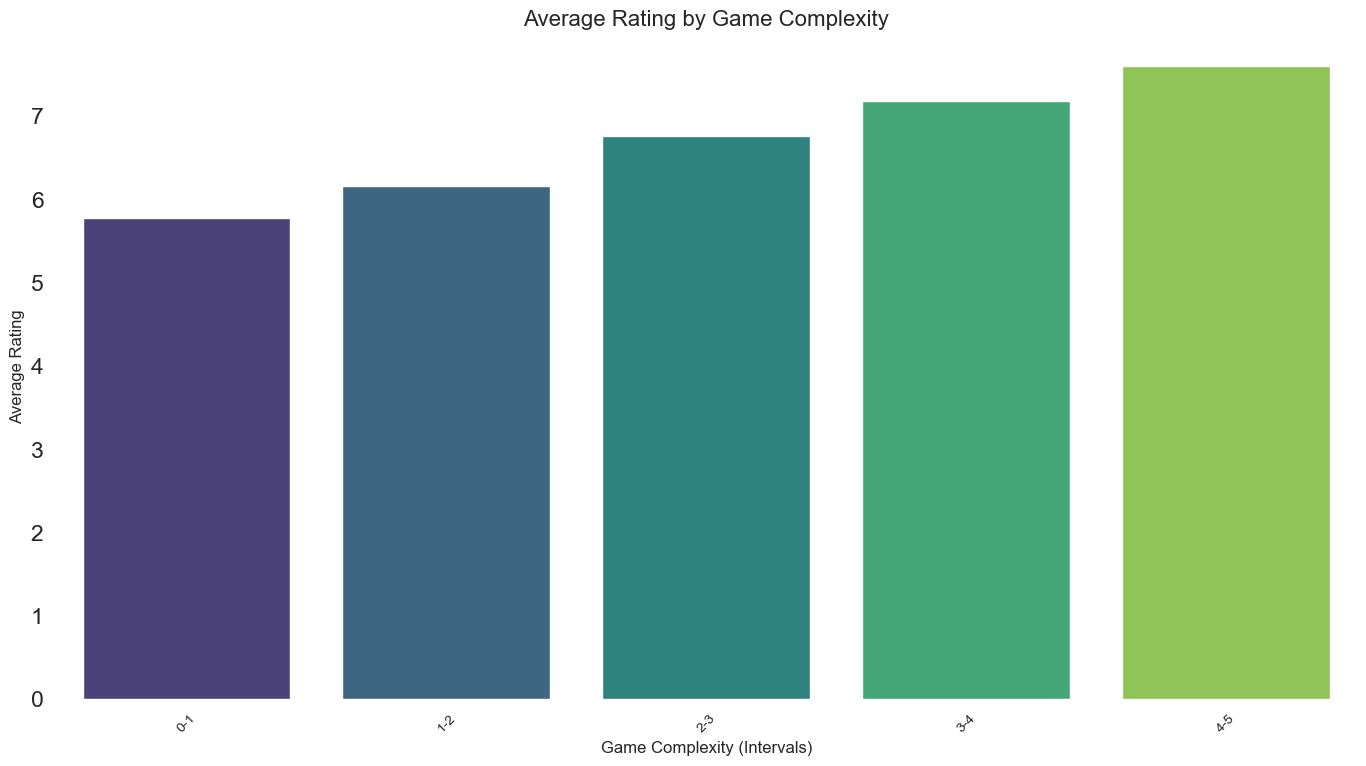

In [294]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define bins for gameweight intervals
bins = [0, 1, 2, 3, 4, 5]  # Define the interval edges
labels = ['0-1', '1-2', '2-3', '3-4', '4-5']  # Labels for each bin

# Create a new column for gameweight intervals
df['gameweight_bin'] = pd.cut(df['gameweight'], bins=bins, labels=labels, include_lowest=True)

# Group by the gameweight_bin and calculate the average rating
gameweight_avg_rating = df.groupby('gameweight_bin')['avgrating'].mean().reset_index()

# Create the bar plot
plt.figure(figsize=(14, 8))
sns.barplot(
    x='gameweight_bin', 
    y='avgrating', 
    data=gameweight_avg_rating, 
    palette="viridis"
)

# Add labels and title
plt.xlabel("Game Complexity (Intervals)", fontsize=12)
plt.ylabel("Average Rating", fontsize=12)
plt.title("Average Rating by Game Complexity", fontsize=16)
plt.xticks(rotation=45, fontsize=10)  # Rotate x-axis labels for better readability
plt.grid(False) 
plt.box(False)
plt.tight_layout()
plt.show()